In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


In [41]:
data_fp = "C:/Users/student/Documents/ml-stock-trading/data/individual_stocks_5yr/individual_stocks_5yr/AAPL_data.csv"
df = pd.read_csv(data_fp)

In [42]:
df

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL


In [43]:
df['date'] = pd.to_datetime(df['date'])

In [44]:
df['local_min'] = df.close[(df.close.shift(1) > df.close) & (df.close.shift(-1) > df.close)]
df['local_max'] = df.close[(df.close.shift(1) < df.close) & (df.close.shift(-1) < df.close)]
df['min_binary'] = df['local_min'].notnull()
df['max_binary'] = df['local_max'].notnull()


In [46]:
df

,date,open,high,low,close,volume,Name,local_min,local_max,min_binary,max_binary
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN,NaN,False,False
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,NaN,68.5614,False,True
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,NaN,NaN,False,False
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,NaN,NaN,False,False
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL,NaN,167.7800,False,True
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL,NaN,NaN,False,False
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL,156.49,NaN,True,False
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL,NaN,163.0300,False,True


<AxesSubplot:>

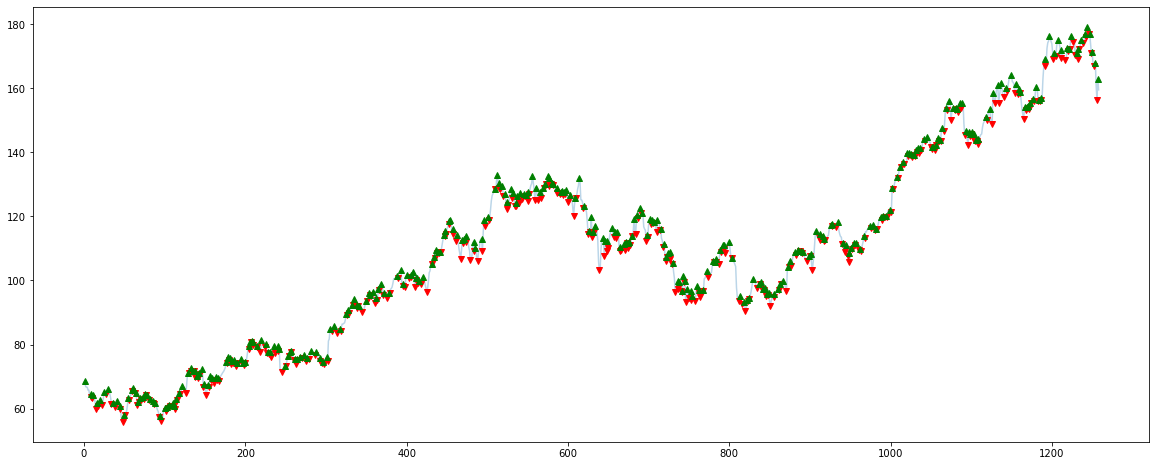

In [57]:
df.close.plot(figsize=(20,8), alpha= .3)
df[df['min_binary']].close.plot(style='.', lw=10, color='red', marker="v")
df[df['max_binary']].close.plot(style='.', lw=10, color='green', marker="^")


<AxesSubplot:xlabel='date'>

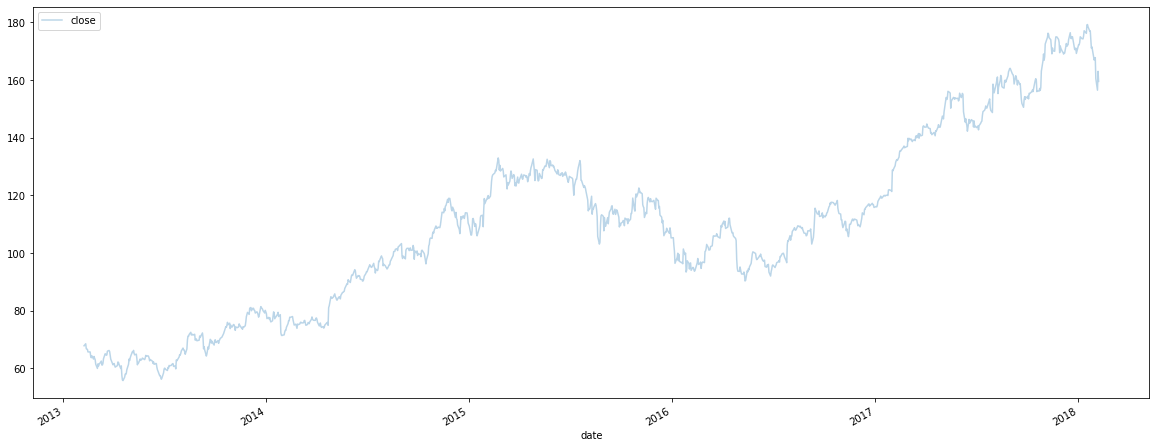

In [58]:
df.plot(x='date', y='close',figsize=(20,8), alpha= .3)